In [1]:
import pandas as pd
import numpy as np


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

import zipfile
import os
import shutil
import random

In [2]:
data = pd.read_csv("data.csv")
data.Fibrosis = data.Fibrosis.replace('-', np.NaN)
data['Equipment'] = 'A'

def sort_by_equipment(equipment):
    return data[(data['Equipment'] == equipment)]['Fibrosis'].value_counts()

data.Fibrosis = pd.to_numeric(data.Fibrosis)

In [3]:
# divide the data by Equipment

def fill_zero(f):
    for i in range(len(f)):
        f[i] = f[i].zfill(4)
    
    return f

def sort_by_tool(equipment):
    f_neg = data[(data['Fibrosis']==0) & (data['Equipment']==equipment.upper())].number.astype(str).tolist()
    f_pos = data[(data['Fibrosis']!=0) & (data['Equipment']==equipment.upper())].number.astype(str).tolist()
    
    # fill the zeros (for foloder name)
    f_neg = fill_zero(f_neg)
    f_pos = fill_zero(f_pos)
    
    return f_neg, f_pos


def move_to_tmp(local_zip, equipment, base_loc):
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('/tmp/Liver_'+equipment)
    zip_ref.close()

def make_folder(base_loc):
    try:
        os.mkdir(base_loc)
        os.mkdir(base_loc+'/training')
        os.mkdir(base_loc+'/training/f0')
        os.mkdir(base_loc+'/training/f1')
        os.mkdir(base_loc+'/testing')
        os.mkdir(base_loc+'/testing/f0')
        os.mkdir(base_loc+'/testing/f1')

    except OSError:
        pass

def move_to_folder(f_, folder_loc, split, base_loc):
    split = int(len(f_)*(1-split))
    
    f_train = f_[:split]
    f_test = f_[split:]
    
    print(folder_loc,':',len(f_train))
    print(folder_loc,':',len(f_test))
    
    new_name = 0
    for folder_name in f_train:
        for root, subdirs, files in os.walk(base_loc+'/'+folder_name):
            for f in files:
                if 'mask' not in f:
                    # file_name change
                    try:
                        file_to_change = os.path.join(root, f)
                        dst = str(new_name)+'.tif'
                        dst = os.path.join(root, dst)
                        print(file_to_change, new_name) ################3
                        
                        os.rename(file_to_change, dst)
                        new_name += 1
                        tmp = base_loc+'/training/'+folder_loc
                        # file move
                        shutil.move(dst, tmp)
                    except:
                        print('error')
    
    new_name = 0                    
    for folder_name in f_test:
        for root, subdirs, files in os.walk(base_loc+'/'+folder_name):
            for f in files:
                if 'mask' not in f:
                    # file_name change
                    try:
                        file_to_change = os.path.join(root, f)
                        dst = str(new_name)+'.tif'
                        print(file_to_change, new_name)######################
                        
                        dst = os.path.join(root, dst)
                        os.rename(file_to_change, dst)
                        new_name += 1
                        tmp = base_loc+'/testing/'+folder_loc
                        # file move
                        shutil.move(dst, tmp)
                    except:
                        print('error')

In [4]:
def train_test_split(equipment, local_zip, split_size):
    equipment = equipment.upper()
    f_false, f_true = sort_by_tool(equipment)
    
    random.shuffle(f_false)
    random.shuffle(f_true)
    
    make_folder(base_loc)
    move_to_tmp(local_zip, equipment, base_loc)
    
    move_to_folder(f_false, 'f0', 0.2, base_loc)
    move_to_folder(f_true, 'f1', 0.2, base_loc)

In [5]:
def ImageGenerator(base_loc):
    TRAINING_DIR = base_loc+'/training'
    train_datagen = ImageDataGenerator(rescale = 1.0/255.)

    train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                       batch_size=64,
                                                       class_mode='binary',
                                                       target_size=(600,800),
                                                       color_mode='rgb') # target_size = (height, width)

    TESTING_DIR = base_loc+'/testing'
    test_datagen = ImageDataGenerator(rescale = 1.0/255.)

    test_generator = train_datagen.flow_from_directory(TESTING_DIR,
                                                       batch_size=32,
                                                       class_mode='binary',
                                                       target_size=(600,800), 
                                                       color_mode='rgb')
    
    return train_generator, test_generator

In [6]:
# change
equipment = 'A' 
local_zip = '../../../Data/Liver.zip'
base_loc = '/tmp/Liver_' + equipment

In [7]:
train_test_split(equipment, local_zip, 0.2)

f0 : 116
f0 : 30
/tmp/Liver_A/1862/mask/1862-0003.tif 0
/tmp/Liver_A/1862/mask/1862-0004.tif 1
/tmp/Liver_A/1862/mask/1862-0005.tif 2
/tmp/Liver_A/1862/mask/1862-0002.tif 3
/tmp/Liver_A/1862/mask/1862-0008.tif 4
/tmp/Liver_A/1862/mask/1862-0001.tif 5
/tmp/Liver_A/1862/mask/1862-0006.tif 6
/tmp/Liver_A/1862/mask/1862-0007.tif 7
/tmp/Liver_A/1862/mask/1862-0009.tif 8
/tmp/Liver_A/2020/mask/2020-0005.tif 9
/tmp/Liver_A/2020/mask/2020-0002.tif 10
/tmp/Liver_A/2020/mask/2020-0003.tif 11
/tmp/Liver_A/2020/mask/2020-0004.tif 12
/tmp/Liver_A/2020/mask/2020-0007.tif 13
/tmp/Liver_A/2020/mask/2020-0001.tif 14
/tmp/Liver_A/2020/mask/2020-0006.tif 15
/tmp/Liver_A/0296/mask/02960008.tif 16
/tmp/Liver_A/0296/mask/02960006.tif 17
/tmp/Liver_A/0296/mask/02960001.tif 18
/tmp/Liver_A/0296/mask/02960010.tif 19
/tmp/Liver_A/0296/mask/02960007.tif 20
/tmp/Liver_A/0296/mask/02960009.tif 21
/tmp/Liver_A/0296/mask/02960011.tif 22
/tmp/Liver_A/0296/mask/02960012.tif 23
/tmp/Liver_A/0296/mask/02960004.tif 24
/t

/tmp/Liver_A/1830/mask/1830-0001.tif 87
/tmp/Liver_A/1830/mask/1830-0006.tif 88
/tmp/Liver_A/1830/mask/1830-0005.tif 89
/tmp/Liver_A/1830/mask/1830-0002.tif 90
/tmp/Liver_A/1830/mask/1830-0003.tif 91
/tmp/Liver_A/1830/mask/1830-0004.tif 92
/tmp/Liver_A/2168/mask/2168-.tif 93
/tmp/Liver_A/1723/mask/1723-0008.tif 94
/tmp/Liver_A/1723/mask/1723-0006.tif 95
/tmp/Liver_A/1723/mask/1723-0001.tif 96
/tmp/Liver_A/1723/mask/1723-0010.tif 97
/tmp/Liver_A/1723/mask/1723-0007.tif 98
/tmp/Liver_A/1723/mask/1723-0009.tif 99
/tmp/Liver_A/1723/mask/1723-0004.tif 100
/tmp/Liver_A/1723/mask/1723-0003.tif 101
/tmp/Liver_A/1723/mask/1723-0002.tif 102
/tmp/Liver_A/1723/mask/1723-0005.tif 103
/tmp/Liver_A/1901/mask/1901-0002.tif 104
/tmp/Liver_A/1901/mask/1901-0005.tif 105
/tmp/Liver_A/1901/mask/1901-0004.tif 106
/tmp/Liver_A/1901/mask/1901-0003.tif 107
/tmp/Liver_A/1901/mask/1901-0007.tif 108
/tmp/Liver_A/1901/mask/1901-0009.tif 109
/tmp/Liver_A/1901/mask/1901-0008.tif 110
/tmp/Liver_A/1901/mask/1901-0006.

/tmp/Liver_A/0484/mask/0484-0004.tif 749
/tmp/Liver_A/0484/mask/0484-0003.tif 750
/tmp/Liver_A/0484/mask/0484-0002.tif 751
/tmp/Liver_A/0484/mask/0484-0005.tif 752
/tmp/Liver_A/0256/mask/0256-0002.tif 753
/tmp/Liver_A/0256/mask/0256-0003.tif 754
/tmp/Liver_A/0256/mask/0256-0004.tif 755
/tmp/Liver_A/0256/mask/0256-0001.tif 756
/tmp/Liver_A/2194/mask/2194-0001.tif 757
/tmp/Liver_A/2194/mask/2194-0002.tif 758
/tmp/Liver_A/0168/mask/0168-0006.tif 759
/tmp/Liver_A/0168/mask/0168-0001.tif 760
/tmp/Liver_A/0168/mask/0168-0004.tif 761
/tmp/Liver_A/0168/mask/0168-0003.tif 762
/tmp/Liver_A/0168/mask/0168-0002.tif 763
/tmp/Liver_A/0168/mask/0168-0005.tif 764
/tmp/Liver_A/0271/mask/0271-0004.tif 765
/tmp/Liver_A/0271/mask/0271-0003.tif 766
/tmp/Liver_A/0271/mask/0271-0002.tif 767
/tmp/Liver_A/0271/mask/0271-0005.tif 768
/tmp/Liver_A/0271/mask/0271-0001.tif 769
/tmp/Liver_A/2424/mask/2424-0001.tif 770
/tmp/Liver_A/2424/mask/2424-0003.tif 771
/tmp/Liver_A/2424/mask/2424-0002.tif 772
/tmp/Liver_A/004

/tmp/Liver_A/0551/mask/0551-0016.tif 103
/tmp/Liver_A/0551/mask/0551-0007.tif 104
/tmp/Liver_A/0551/mask/0551-0009.tif 105
/tmp/Liver_A/0551/mask/0551-0017.tif 106
/tmp/Liver_A/0551/mask/0551-0010.tif 107
/tmp/Liver_A/0551/mask/0551-0008.tif 108
/tmp/Liver_A/0551/mask/0551-0001.tif 109
/tmp/Liver_A/0551/mask/0551-0006.tif 110
/tmp/Liver_A/2247/mask/2247-0001.tif 111
/tmp/Liver_A/2247/mask/2247-0003.tif 112
/tmp/Liver_A/2247/mask/2247-0002.tif 113
/tmp/Liver_A/0104/mask/0104-0006.tif 114
/tmp/Liver_A/0104/mask/0104-0001.tif 115
/tmp/Liver_A/0104/mask/0104-0002.tif 116
/tmp/Liver_A/0104/mask/0104-0005.tif 117
/tmp/Liver_A/0104/mask/0104-0004.tif 118
/tmp/Liver_A/0104/mask/0104-0003.tif 119
/tmp/Liver_A/0435/mask/0435-0005.tif 120
/tmp/Liver_A/0435/mask/0435-0002.tif 121
/tmp/Liver_A/0435/mask/0435-0003.tif 122
/tmp/Liver_A/0435/mask/0435-0004.tif 123
/tmp/Liver_A/0435/mask/0435-0007.tif 124
/tmp/Liver_A/0435/mask/0435-0001.tif 125
/tmp/Liver_A/0435/mask/0435-0006.tif 126
/tmp/Liver_A/247

In [8]:
# training

# error files:
# 1881/mask/1881-0006.tif
# 1813/mask/1813-0002.tif
# 2103/mask/2013-0001.tif

In [8]:
print("Training Fibrosis 0:", len(os.listdir(base_loc+'/training/f0')))
print("Testing Fibrosis 0:", len(os.listdir(base_loc+'/testing/f0')))
print("-"*25)
print("Training Fibrosis 1:", len(os.listdir(base_loc+'/training/f1')))
print("Testing Fibrosis 1:", len(os.listdir(base_loc+'/testing/f1')))

Training Fibrosis 0: 866
Testing Fibrosis 0: 243
-------------------------
Training Fibrosis 1: 1553
Testing Fibrosis 1: 419


In [9]:
train_generator, test_generator = ImageGenerator(base_loc)

Found 2419 images belonging to 2 classes.
Found 662 images belonging to 2 classes.


#### GVC 16 (transfer learning)

In [14]:
from tensorflow.keras.applications.vgg16 import VGG16
pre_trained_model = VGG16(include_top=False,
                          weights='imagenet',
                          input_shape=(600,800,3))

input_layer = pre_trained_model.input

for layer in pre_trained_model.layers:
    layer.trainable = False

In [15]:
x = pre_trained_model.layers[-1].output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)  
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [22]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 600, 800, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 600, 800, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 600, 800, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 300, 400, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 300, 400, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 300, 400, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 150, 200, 128)     0     

In [24]:
"""
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.999):
            print("\nReached 99.9% accuracy so cancelling training")
            self.model.stop_training = True
"""
model = tf.keras.models.Model(inputs=input_layer,
                             outputs=x)

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_generator,
                    epochs=10,
                    validation_data=test_generator)

Epoch 1/10


ResourceExhaustedError:  OOM when allocating tensor with shape[64,64,600,800] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node functional_2/block1_conv1/Relu (defined at <ipython-input-24-e5b81c58f0ea>:15) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_2768]

Function call stack:
train_function


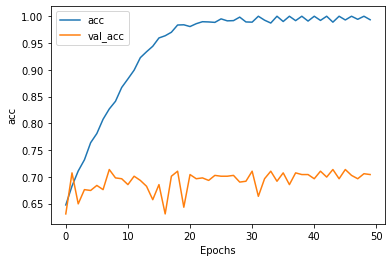

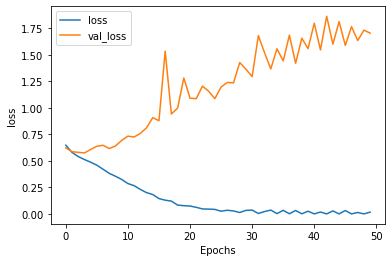

In [18]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [26]:
# delete the data

shutil.rmtree('/tmp/Liver_'+equipment)

In [ ]:
import os, signal

os.kill(os.getpid(),signal.SIGKILL)